# Task
We want to build a machine learning model to predict species of Iris flower given the Iris features like sepal length, sepal width, petal length and petal width!

There are 3 classes of predictions. It means that the species we are going to predict can be of one of 3 categories / species - setosa, versicolor, virginica.

That's why this is a multiclass classification task. Thus in this notebook we will be using a method which is a generalisation of logistic regression - **Softmax Regression**

I wish to note up front that I have taken help from following sources - 
- a notebook from Kaggle, the link for which is https://www.kaggle.com/code/kwasiransom/softmax-from-scratch/notebook. 
- Andrew Ng's Machine Learning Specialisation of coursera (I have also included a few screenshots from the lectures)

I am grateful for the learning experience.

## Brief about the notebook!!

What's unique?

So in this notebook *I tried to code all the algorithms from scratch*, rather than relying on some advanced libraries to carry out this task like sklearn.

This process helped me develop deeper understanding of what goes behind the scenes to make it work. The algorithms / functions I tried to define from scractch include -
1. Function to calculate Softmax Score (z) given the values for X, weights (w) and bias(b)
2. Function to convert the Softmax Score found above into a Softmax output of probabilties which sum up to 1 for each training example
3. Prediction algorithm that takes in as input the probabilities found above and spits out the prediction as one of the categories / classes for that observation (one of the three classes in this example)

The above three algorithm only make sense if we have come up with good enough values for w and b. To find that, we would need to implement below algorithms first!

4. Algorithm to implement Cossentropy cost - This spits out as output a scalar value as cost for our choice of w and b
5. Algorithm to implement Gradient equation that caluclates partial derivatives of cost for our choices of w and b. And then simulaneously updates w and b towards the direction of convergence
6. Finally, a routine to implement Gradient Descent using the above algorithms to arrive at the optimum values for w and b.

Once we find good enough values of w and b, we can use them to start making predictions for the species of Iris, given any values for features!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv('IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [164]:
X = data.values[:,:-1]

In [165]:
X = X.astype(float)

In [166]:
y = data.values[:,-1]

In [167]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [168]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [169]:
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [170]:
X.shape, y.shape

((150, 4), (150,))

# One hot Encoding of y

In [171]:
# Let's first change the strings to integers for y

y_labels = np.unique(y)

for i in range(len(y)):
    if y[i] == y_labels[0]:
        y[i] = 0
    elif y[i] == y_labels[1]:
        y[i] = 1
    else:
        y[i] = 2
    
    

In [172]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [173]:
type(y[0])

int

In [174]:
def to_one_hot(y):
    shape = (y.size, len(np.unique(y)))
    one_hot = np.zeros(shape)
    one_hot[np.arange(y.size), y.astype(int)] = 1
    return one_hot

In [175]:
# Let's convert y to one_hot

y_one_hot = to_one_hot(y)
y_one_hot[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [176]:
y_one_hot.shape

(150, 3)

In [177]:
# Awesome the data is prepared now for further analysis.

# Let's start by visualising the data

this will give us a feel for the data, which is imp before doing any analysis

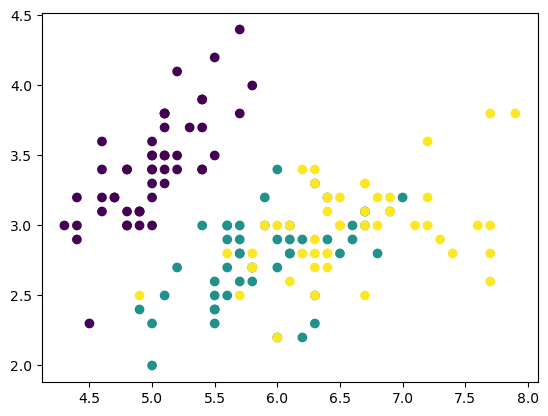

In [178]:
plt.scatter(X[:,0],X[:,1],c=y)

In [179]:
import seaborn as sns

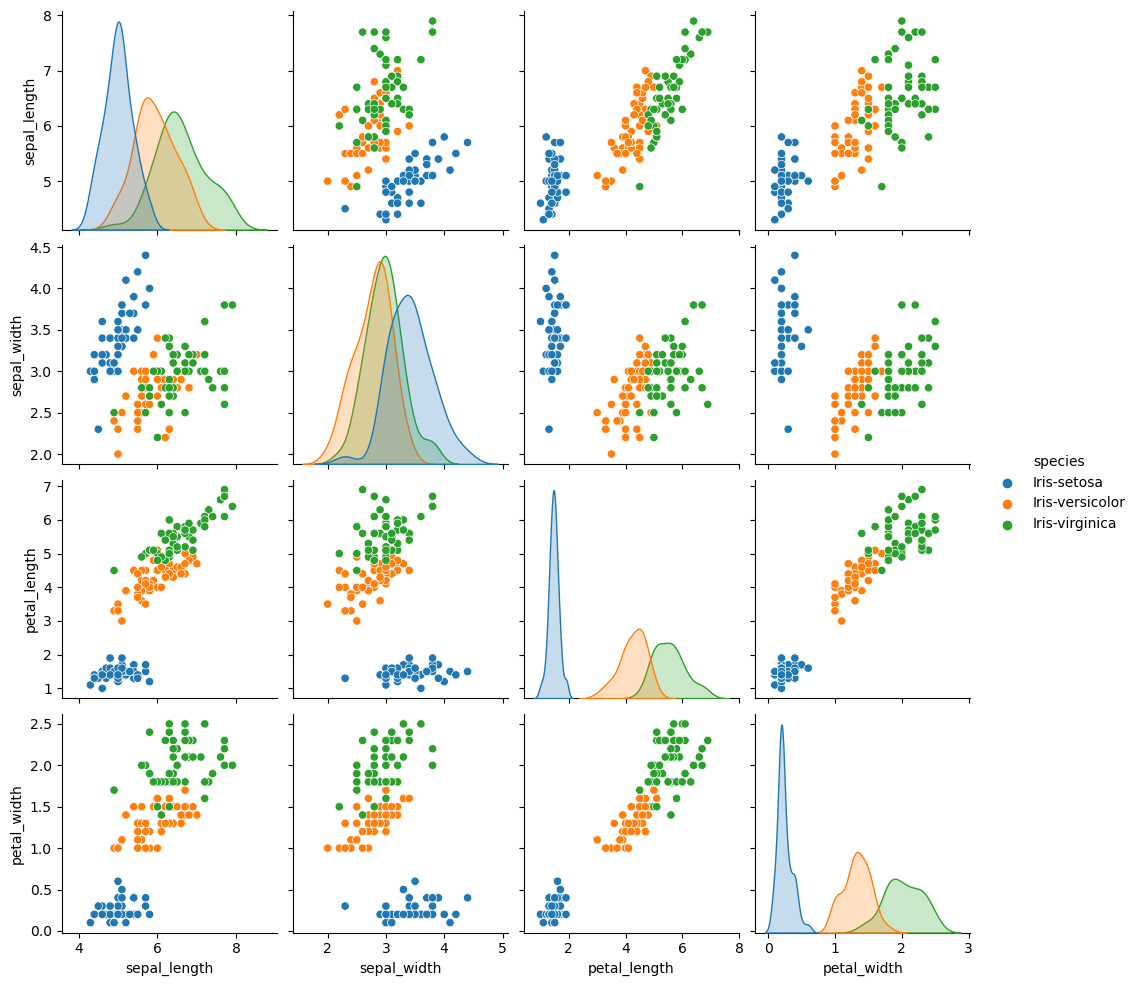

In [180]:
sns.pairplot(data=data,hue='species')

In [80]:
# It is clear from above that three seperate clusters are being formed.
# Thus softmax regression can be very useful to make multi class prediction, given the features

In [84]:
# Oh one last thing before we proceed. Let's normalise the data for X

In [181]:
X.max(axis=0)

array([7.9, 4.4, 6.9, 2.5])

In [182]:
X = X/X.max(axis=0)

In [183]:
X.max(axis=0) #confirmed that the above worked fine

array([1., 1., 1., 1.])

In [184]:
X[:5]

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ]])

Now that the data is ready, and we have got the feel for the data, let's start working on devising a few algorithms which will implememt some important equations to make softmax regression happen. We need to define functions for them, which would include -

1. Softmax Score z
2. Softmax function to convert the z to g(z) - basically probabilities that all up to 1 for any given example
3. Prediction algorithm that takes in values for X, w and b and spits out the prediction
4. Function to compute cost
5. Function that caluclates gradient and updates w and b simultaneously
6. a routine to implement the above things to run gradient descent to get optimum values for w and b

Let's start with the first!!

## Softmax Score z

We want to define a function that calculates z1 .. z4 all at one go -
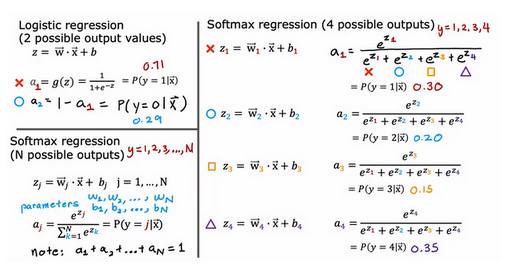

In [185]:
def SoftmaxScore(X, W, b):
    Z = X@W + b
    return Z
    
# the result is going to be an array of 3 z scores for each training example - one for each class
# and the same repeated for all the training examples

In [186]:
w_tmp = np.random.randn(X.shape[1],len(np.unique(y)))

In [187]:
b_tmp = np.random.randn(len(np.unique(y)))
b_tmp.shape

(3,)

In [252]:
# trial
tmp_Z = SoftmaxScore(X, w_tmp, b_tmp)
tmp_Z[:5]
# worked

array([[ 1.02193051, -1.53018602,  1.81580671],
       [ 0.90325991, -1.41728698,  1.67745862],
       [ 0.89416383, -1.51446293,  1.75971797],
       [ 0.86896406, -1.51207281,  1.74808157],
       [ 1.0197885 , -1.58081604,  1.8592542 ]])

## Softmax Function:
to convert the z scores we got above into a bunch of probabilities

We will try to implement the following:

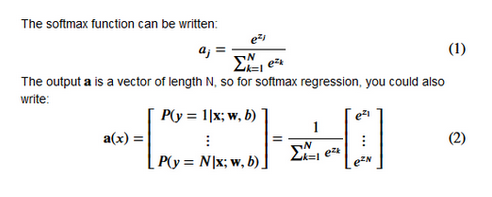

In [189]:
def SoftmaxFunction(Z):
    eZ = np.exp(Z)
    sm = eZ / np.sum(eZ, axis=1, keepdims=True)
    return sm

In [251]:
# Trial

tmp_sm = SoftmaxFunction(tmp_Z)
tmp_sm[:5]

array([[0.30396334, 0.02368378, 0.67235287],
       [0.30608434, 0.03006356, 0.6638521 ],
       [0.28849528, 0.0259469 , 0.68555783],
       [0.2856141 , 0.02640636, 0.68797955],
       [0.29504109, 0.02190051, 0.68305839]])

In [194]:
tmp_sm.shape

(150, 3)

## Prediction Algorithm:
that takes in input as sm (probabilities) and spits out one of the 3 classes - 0, 1, or 2

In [197]:
def Prediction(sm):
    return np.argmax(sm, axis=1)

In [202]:
# trial

Prediction(tmp_sm)

#it's all 2, because we have not yet trained the model yet

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

## Crossentropy Cost:
we need to a function to calculate cost of the model for the given values of w and b

We need to implement the following:
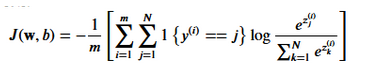

In [213]:
def CrossentropyCost(sm, y):
    cost = -np.mean(np.sum(np.log(sm) * y, axis=1))
    return cost

In [204]:
tmp_sm.shape

(150, 3)

In [206]:
y_one_hot.shape

(150, 3)

In [214]:
np.sum(tmp_sm * y_one_hot, axis=1).shape

(150,)

## Gradient Function

We need to finally implement following equation that caluclates the gradient and implements gradient descent to adjust values of w and b:

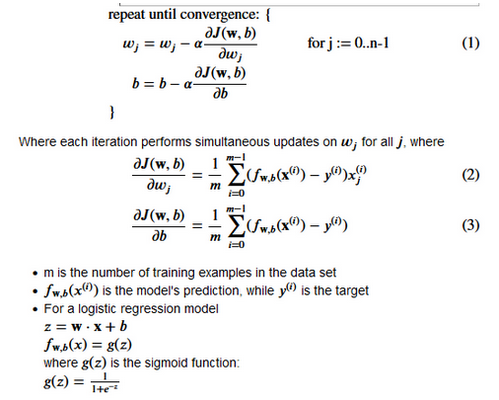

In [236]:
def GradientSteps(sm, y, X, w, b, alpha):
    m = X.shape[0]
    cost = sm - y
    dj_dw = np.dot(X.T, cost) / m
    
    dj_db = (np.sum(cost, axis=0)) / m
    
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    
    return w, b

In [217]:
tmp_sm.shape, y_one_hot.shape

((150, 3), (150, 3))

In [221]:
X.T.shape

(4, 150)

## All's done! Gradient Descent time!!

Develop a routine to implement the gradient descent and come up with optimum values for w and b


In [237]:

epochs = 50000
cost_ = []
w = np.random.randn(X.shape[1],len(np.unique(y)))
b = np.random.randn(len(np.unique(y)))
alpha = 0.5

In [238]:

for epoch in range(epochs):
    Z = SoftmaxScore(X,w,b)
    sm = SoftmaxFunction(Z)
    
    cost = CrossentropyCost(sm, y_one_hot)
    cost_.append(cost)
    
    w, b = GradientSteps(sm, y_one_hot, X, w, b, alpha)
    
    if epoch % 1000 == 0:
        print(f"epoch: {epoch}, Cost: {cost}")


epoch: 0, Cost: 2.3243519381046567
epoch: 1000, Cost: 0.19651781341146257
epoch: 2000, Cost: 0.14044895777739974
epoch: 3000, Cost: 0.1165927464075061
epoch: 4000, Cost: 0.10281446821059768
epoch: 5000, Cost: 0.09363853408883664
epoch: 6000, Cost: 0.08700240182981568
epoch: 7000, Cost: 0.08193794859312903
epoch: 8000, Cost: 0.0779236690761653
epoch: 9000, Cost: 0.07465075113765557
epoch: 10000, Cost: 0.07192325761818004
epoch: 11000, Cost: 0.06961016325199293
epoch: 12000, Cost: 0.0676201574512811
epoch: 13000, Cost: 0.06588745276248574
epoch: 14000, Cost: 0.06436333302670734
epoch: 15000, Cost: 0.06301088430190192
epoch: 16000, Cost: 0.06180158236111662
epoch: 17000, Cost: 0.06071301018864273
epoch: 18000, Cost: 0.059727288560206246
epoch: 19000, Cost: 0.058829970828608275
epoch: 20000, Cost: 0.058009248177599594
epoch: 21000, Cost: 0.057255367501006564
epoch: 22000, Cost: 0.05656019798038109
epoch: 23000, Cost: 0.055916903610721214
epoch: 24000, Cost: 0.05531969248557595
epoch: 25000

Text(0.5, 1.0, 'Cost Plot')

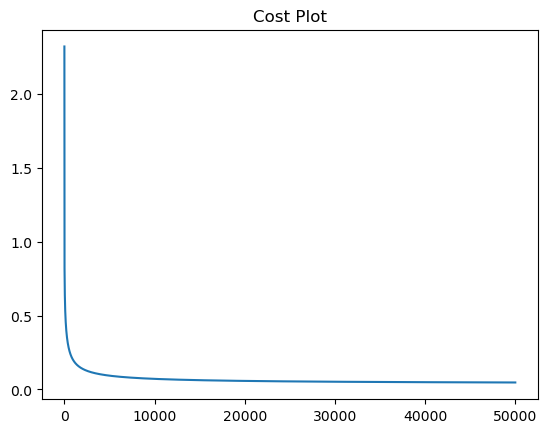

In [239]:
plt.plot(cost_)
plt.title('Cost Plot')

In [240]:
# Awesome!! We found our w and b. And they are
w

array([[  1.20423637,   3.91321027,  -7.60048997],
       [ 14.55541996,   1.79059863, -14.88930582],
       [-18.71382724,  -6.99213508,  27.13493075],
       [-20.43376175,  -3.03675995,  24.85296444]])

In [241]:
b

array([  8.88301907,   5.98164023, -16.94491396])

# Let's Predict

In [243]:
Predict = Prediction(SoftmaxScore(X, w, b))

In [245]:
Predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [246]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [248]:
Accuracy = np.mean(Predict==y)
Accuracy

0.98

In [249]:
# Almost perfect! Well done!!

Text(0.5, 0, 'sepal_length')

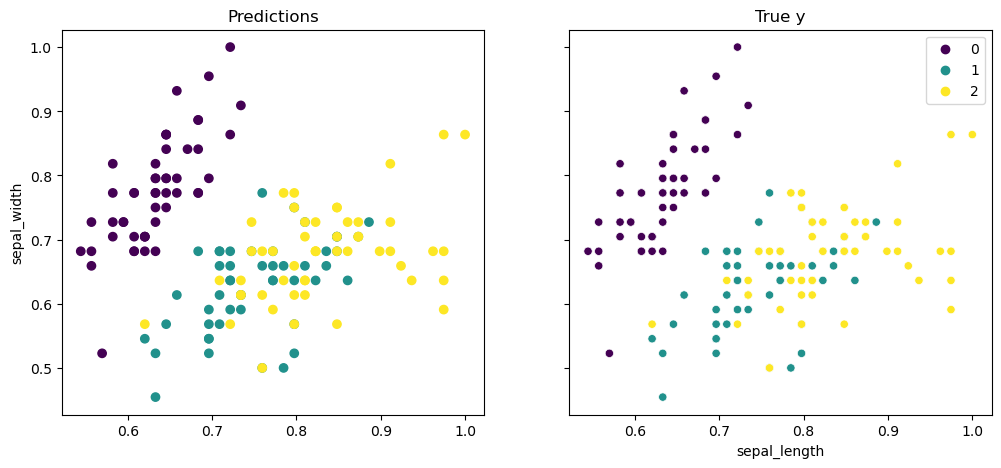

In [280]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharey=True)
axes[0].scatter(x = X[:,0], y = X[:,1], c=Predict)
axes[0].set_ylabel('sepal_width')
axes[0].set_title('Predictions')
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y, palette='viridis')
plt.title('True y')
plt.xlabel('sepal_length')

In [281]:
# Both the above look almost identical. It means the classification was successful. and the model was trained well!

# Well done!!